# Crop Image with OpenCV

__Cropping is the act of selecting and extracting the Region of Interest__ (or simply, ROI) __and is the part of the image in which we are interested__. For instance, in a face detection application, we may want to crop the face from an image. And if we were developing a Python script to recognize dogs in images, we may want to crop the dog from the image once we have found it.

We represent OpenCV images as NumPy arrays since each image is a NumPy array, we can leverage NumPy array slicing to crop an image. When we crop an image, we want to remove the outer parts of the image we are not interested in. We commonly refer to this process as selecting our Region of Interest, or more simply, our ROI. We can accomplish image cropping by using NumPy array slicing.

There is no specific function for cropping using OpenCV, NumPy array slicing is what does the job. Every image that is read in, gets stored in a 2D array (for each color channel). Simply specify the height and width (in pixels) of the area to be cropped. And it’s done!

When applying NumPy array slicing to images, we extract the ROI using the following syntax:
```
roi = image[startY:endY, startX:endX]
```
The ```startY:endY``` slice provides our rows (since the y-axis is our number of rows) while ```startX:endX``` provides our columns (since the x-axis is the number of columns) in the image. 

[Reference](https://pyimagesearch.com/2021/01/19/crop-image-with-opencv/)

In [2]:
import os
os.environ["OPENCV_IO_ENABLE_OPENEXR"] = "1"

import cv2
# import OpenEXR
# import Imath
from PIL import Image
import array
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
import seaborn as sns

In [4]:
I = np.arange(0, 25).reshape((5, 5))

In [6]:
I

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [9]:
# Suppose you want to extract the 'pixels' starting at x = 0, y = 0 and ending at x = 2, y = 3-
I[0:3, 0:2]

array([[ 0,  1],
       [ 5,  6],
       [10, 11]])

In [10]:
# Say that you want to extract the pixels starting at x = 1, y = 3 and ending at x = 5 and y = 5-
I[3:5, 1:5]

array([[16, 17, 18, 19],
       [21, 22, 23, 24]])

In [11]:
# Read image-
img = cv2.imread("/home/majumdar/Pictures/meme.png")

In [12]:
height, width, channels = img.shape
print(f"Image height = {height}, width = {width} & # of channels = {channels}")

Image height = 680, width = 615 & # of channels = 3


The order in which we supply the indexes to the crop may seem counterintuitive; however, remember that __OpenCV represents images as NumPy arrays with the height first (# of rows) and the width second (# of columns)__.

To perform our cropping, NumPy expects four indexes:

- Start y: The starting y-coordinate. In this case, we start at y = 85.
- End y: The ending y-coordinate. We will end our crop at y = 250.
- Start x: The starting x-coordinate of the slice. We start the crop at x = 85.
- End x: The ending x-axis coordinate of the slice. Our slice ends at x = 220.

In [39]:
# start: (x1, y1) and end: (x2, y2)-
start = (388, 394)
end = (548, 504)

In [43]:
# width = |y2 - y1| and height: |x2 - x1|-
width_img  = np.abs(end[0] - start[0])
height_img = np.abs(end[1] - start[1])
width_img, height_img

(160, 110)

<Figure size 800x700 with 0 Axes>

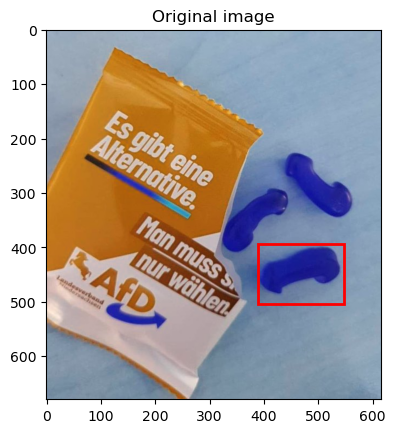

In [44]:
plt.figure(figsize = (8, 7))

# define Matplotlib figure and axis-
fig, ax = plt.subplots()

# plt.imshow(img)
ax.imshow(img)
ax.set_title('Original image')

# add rectangle to plot-
ax.add_patch(
    Rectangle(
        # xy = (1, 1), width = 100,
        xy = start, width = width_img,
        # height = 20, angle = 0,
        height = height_img, angle = 0,
        edgecolor = 'red', facecolor = 'blue',
        fill = False, lw = 2
    )
)

# apply another image crop, this time extracting the body
# body = image[90:450, 0:290]

plt.show()